In [577]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [578]:
data = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")

In [579]:
class LinearRegression:
	def min_max_norm(data_list):
		normalized_data = []

		for data in data_list:
			normalized_x = (data - min(data_list)) / (max(data_list) - min(data_list))
			normalized_data.append(normalized_x)
		
		return normalized_data
	
	def zscore_norm(data_list):
		normalized_data = []

		for data in data_list:
			z_score = (data - np.mean(data_list)) / np.std(data_list)
			normalized_data.append(z_score)

		return normalized_data

	def fit (self, X, Y, s, text=""):
		global x
		global y
		X = np.array(X).reshape(1, -1)
		Y = np.array(Y).reshape(1, -1)
		x_shape = X.shape
		num_var = x_shape[0]
		self.parameter_cahce = []
		self.preds = []
		self.weight = np.random.normal(0, 1, (num_var, 1))
		self.bias = np.random.rand(1)
		self.num_iteration = 50

		for t in range(1, self.num_iteration + 1):
			N = x_shape[1]
			self.delta_W = 2/N * (np.sum(np.multiply(((np.matmul(self.weight, X) + self.bias) - Y), X)))
			self.delta_bias = 2/N * (np.sum(((np.matmul(self.weight, X) + self.bias) - Y)))
			self.weight -= 0.1 * self.delta_W
			self.bias -= 0.1 * self.delta_bias

			if s == 2 and t % 10 == 0:
				plt.scatter(x[-180:], y[-180:])
				pred = self.predict(np.array(x[-180:]))
				plt.plot(x[-180:], pred, 'red')
				plt.title(f'iteratrion #{t}')
				plt.show()

			elif s == 3 and t == 50:
				plt.scatter(x[-180:], y[-180:])
				pred = self.predict(np.array(x[-180:]))
				plt.plot(x[-180:], pred, 'red')
				plt.title(text)
				plt.show()

	def predict(self, X):
		product = np.matmul(self.weight, np.array(X).reshape(1, -1)) + self.bias
		return product.reshape(-1)

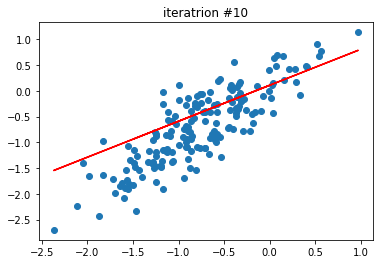

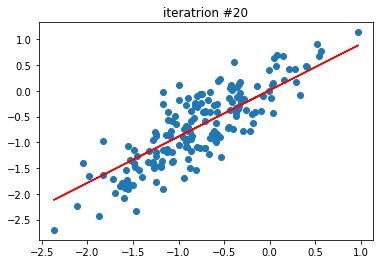

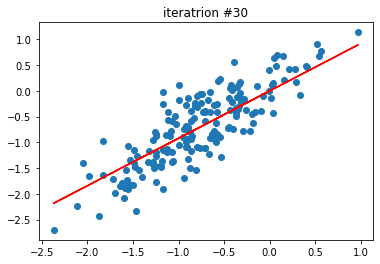

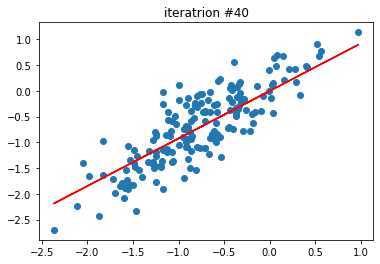

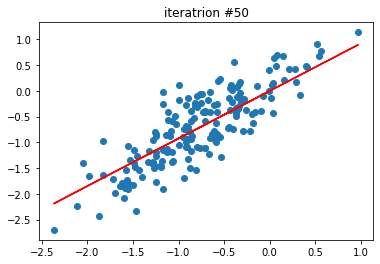

In [580]:
reg = LinearRegression()
x = (data['Weight'] - data['Weight'].mean()) / data['Weight'].std()
y = (data['Height'] - data['Height'].mean()) / data['Height'].std()
reg.fit(x[:-180], y[:-180], 2)

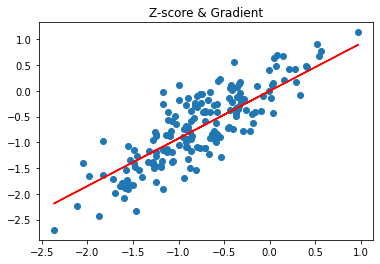

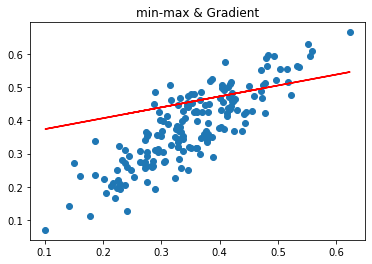

In [581]:
reg = LinearRegression()
x = (data['Weight'] - data['Weight'].mean()) / data['Weight'].std()
y = (data['Height'] - data['Height'].mean()) / data['Height'].std()
reg.fit(x[:-180], y[:-180], 3, "Z-score & Gradient")

reg = LinearRegression()
x = (data['Weight'] - data['Weight'].min()) / (data['Weight'].max() - data['Weight'].min())
y = (data['Height'] - data['Height'].min()) / (data['Height'].max() - data['Height'].min())
reg.fit(x[:-180], y[:-180], 3, "min-max & Gradient")